In [116]:
import numpy as np
from scipy.stats import truncnorm, bernoulli
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(seed=42)

In [117]:
# Define macros
NUM_SAMPLES = 2
NUM_OTUS = 10
NUM_CLUSTERS = 3
TOTAL_TIME_STEPS = 14
TIME_STEP_SIZE = 0.005
NUM_TIME_POINTS = int(TOTAL_TIME_STEPS/TIME_STEP_SIZE)

In [118]:
# Compute X_k+1 using X_k for a given OTU i
# X_ki, a_i1, a_i2, w_k, w_k_1: Numbers
# b_ij, X_kj: Vectors
def compute_gLV_X_OTU(X_k, a_1, a_2, A, w):
    term_1 = X_k + X_k * (a_1 + a_2 * X_k + A @ X_k) * TIME_STEP_SIZE
    term_2 = w * np.sqrt(TIME_STEP_SIZE)
    
    return term_1 + term_2

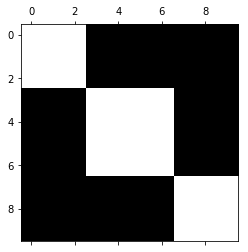

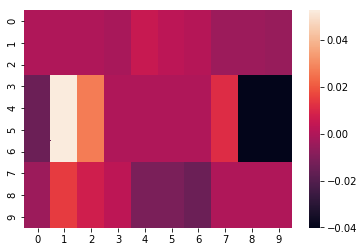

In [119]:
# Init cluster assignments
clusters = np.array([[0, 1, 2], [3, 4, 5, 6], [7, 8, 9]])
otu_idx = np.arange(0, NUM_OTUS, 1)

# Init X and params with constraints for a given sample
X_init = np.random.uniform(0, 10, (NUM_OTUS))
X = np.zeros((NUM_OTUS, NUM_TIME_POINTS))
X[:, 0] = X_init
a_1 = truncnorm.rvs(0, 1, size=(NUM_OTUS), random_state=42)
a_2 = truncnorm.rvs(-1, 0, size=(NUM_OTUS), random_state=42)
inter_mat = np.zeros((NUM_OTUS, NUM_OTUS))

# Init interactions b/w clusters
for cluster in clusters:
    target_ids = np.delete(otu_idx, cluster)
    num_targets = len(target_ids)
    trunc_a = np.amin(np.absolute(a_2[cluster]))/num_targets
    sample_trunc = truncnorm.rvs(-trunc_a, trunc_a, 
                                 size=(1, num_targets), 
                                 random_state=42)
    for sidx in cluster:
        inter_mat[sidx, target_ids] = sample_trunc

plt.spy(inter_mat)
plt.show()
h1 = sns.heatmap(inter_mat)

# Init process variance
w = np.random.normal(0, np.sqrt(0.5), size=(NUM_OTUS, NUM_TIME_POINTS-1))

In [120]:
for t in range(1, NUM_TIME_POINTS):
    X[:, t] = compute_gLV_X_OTU(X[:, t-1], a_1, a_2, inter_mat, w[:, t-1])

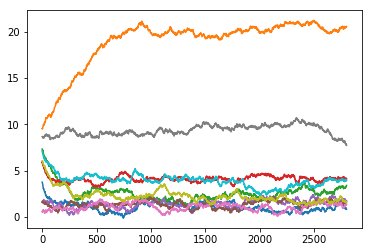

In [121]:
for otu in otu_idx:
    plt.plot(np.arange(NUM_TIME_POINTS), X[otu, :])
plt.show()

In [122]:
samples_idx = np.arange(0, NUM_TIME_POINTS, 
                        int(NUM_TIME_POINTS/TOTAL_TIME_STEPS), 
                        dtype='int32')

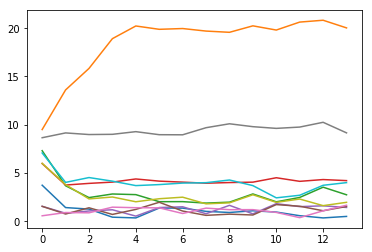

In [123]:
for otu in otu_idx:
    plt.plot(np.arange(TOTAL_TIME_STEPS), X[otu, samples_idx])
plt.show()